**Author**: *Vasileios Ntaoulas (DWS)* (ntaoulasv@csd.auth.gr) --> AEM: 139

# Final Project: Rock-Scissors-Paper Agent

DESCRIPTION: This dataset contains images of hand gestures from the Rock-Paper-Scissors game. The images were captured as part of a hobby project where I developped a Rock-Paper-Scissors game using computer vision and machine learning on the Raspberry Pi (https://github.com/DrGFreeman/rps-cv)

CONTENTS: The dataset contains a total of 2188 images corresponding to the 'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand gestures of the Rock-Paper-Scissors game. All image are taken on a green background with relatively consistent ligithing and white balance.

FORMAT: All images are RGB images of 300 pixels wide by 200 pixels high in .png format. The images are separated in three sub-folders named 'rock', 'paper' and 'scissors' according to their respective class.

## GitHub link

https://github.com/lasdaou/Rock-Paper-Scissors-Agent

# Import Libraries

In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn.model_selection import train_test_split

# Useful functions

In [75]:
# Function to load, resize, and normalize images and assign labels
def load_images_with_labels(folder, label, scale_factor=0.6):
    files = [os.path.join(folder, f) for f in os.listdir(folder)]
    labels = [label] * len(files)
    
    images = [np.array(Image.open(filename).resize((int(scale_factor * Image.open(filename).width), int(scale_factor * Image.open(filename).height)))) / 255.0 for filename in files]

    return images, labels

In [76]:
# Function to apply random transformations to an image
def apply_random_transformations(image, p1=0.5, p2=0.5, noise_std=0.05):
    
    # Vertical flip with probability p1
    if np.random.rand() < p1:
        image = np.flipud(image)
    
    # Horizontal flip with probability p2
    if np.random.rand() < p2:
        image = np.fliplr(image)

    # Add noise
    noise = np.random.normal(0, 255 * noise_std, size=image.shape)
    image = image + noise
    image = np.clip(image, 0, 255)

    return image

In [77]:
#  I just use this function to modify my images
def load_and_resize_images(folder, target_size=(120, 180)):
    files = [os.path.join(folder, f) for f in os.listdir(folder)]
    images = [np.array(Image.open(filename).resize(target_size).convert('RGB')) / 255.0 for filename in files]
    return images

# Get image data

In [78]:
original_path = os.getcwd()

# folder names
rock_folder = 'rock'
scissors_folder = 'scissors'
paper_folder = 'paper'

# Load, resize, and normalize images and assign labels for each folder
rock_images, rock_labels = load_images_with_labels(rock_folder, 0)
scissors_images, scissors_labels = load_images_with_labels(scissors_folder, 1)
paper_images, paper_labels = load_images_with_labels(paper_folder, 2)

# Combine all images and labels
all_images = rock_images + scissors_images + paper_images
all_labels = rock_labels + scissors_labels + paper_labels

## Train-Test split

In [79]:
# Perform train-test split for each class (20% for testing)
images_train_rock, images_test_rock, labels_train_rock, labels_test_rock = train_test_split(rock_images, rock_labels, test_size=0.2, random_state=0)
images_train_scissors, images_test_scissors, labels_train_scissors, labels_test_scissors = train_test_split(scissors_images, scissors_labels, test_size=0.2, random_state=0)
images_train_paper, images_test_paper, labels_train_paper, labels_test_paper = train_test_split(paper_images, paper_labels, test_size=0.2, random_state=0)

# Combine the splits for all classes
images_train = images_train_rock + images_train_scissors + images_train_paper
labels_train = labels_train_rock + labels_train_scissors + labels_train_paper
images_test = images_test_rock + images_test_scissors + images_test_paper
labels_test = labels_test_rock + labels_test_scissors + labels_test_paper

# Convert lists to numpy arrays
X_train = np.array(images_train)
X_test = np.array(images_test)
y_train = np.array(labels_train)
y_test = np.array(labels_test)

# Print the shapes
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)    
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1749, 120, 180, 3)
X_test shape: (439, 120, 180, 3)
y_train shape: (1749,)
y_test shape: (439,)


In [80]:
# Flatten the images
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

## ML models

In [81]:
# Define a dictionary of models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0),
    'SVM': SVC(kernel='linear', random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_flatten, y_train)
    predictions = model.predict(X_test_flatten)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

Random Forest Accuracy: 0.9658314350797267
MLP Classifier Accuracy: 0.9020501138952164
SVM Accuracy: 0.9111617312072893
Decision Tree Accuracy: 0.8314350797266514


Based on the accuracy, i chose Random Forest Classifier

In [82]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_flatten, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_flatten)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9658314350797267


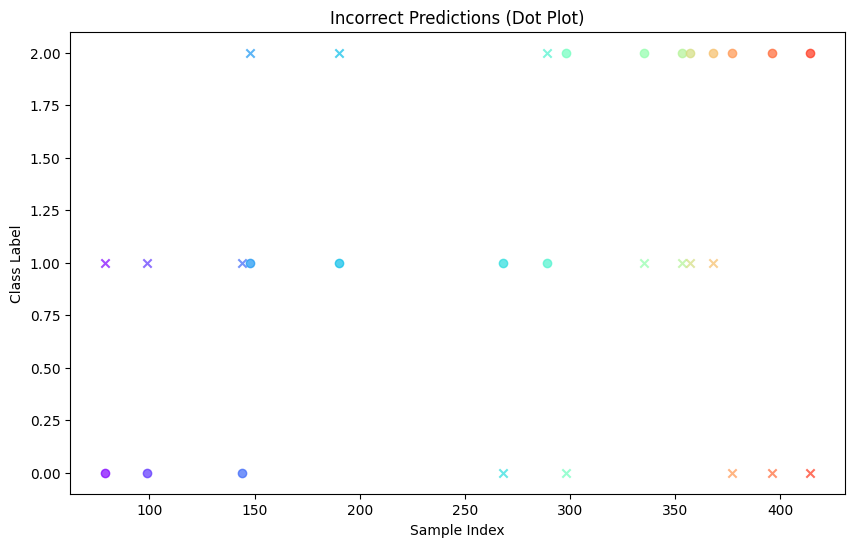

Pair 0: The correct value is 0, and the predicted value is 1.
Pair 1: The correct value is 0, and the predicted value is 1.
Pair 2: The correct value is 0, and the predicted value is 1.
Pair 3: The correct value is 1, and the predicted value is 2.
Pair 4: The correct value is 1, and the predicted value is 2.
Pair 5: The correct value is 1, and the predicted value is 0.
Pair 6: The correct value is 1, and the predicted value is 2.
Pair 7: The correct value is 2, and the predicted value is 0.
Pair 8: The correct value is 2, and the predicted value is 1.
Pair 9: The correct value is 2, and the predicted value is 1.
Pair 10: The correct value is 2, and the predicted value is 1.
Pair 11: The correct value is 2, and the predicted value is 1.
Pair 12: The correct value is 2, and the predicted value is 0.
Pair 13: The correct value is 2, and the predicted value is 0.
Pair 14: The correct value is 2, and the predicted value is 0.


In [83]:
# Find indices where predictions are incorrect
incorrect_indices = np.where(predictions != y_test)[0]

# Create a dot plot for incorrect predictions with unique colors for each pair
plt.figure(figsize=(10, 6))

for i, index in enumerate(incorrect_indices):
    actual_value = y_test[index]
    predicted_value = predictions[index]
    
    color = plt.cm.rainbow(i / len(incorrect_indices))  # Rainbow color map
    
    # Plot actual value
    plt.scatter(index, actual_value, label=f'Actual {i}', marker='o', color=color, alpha=0.7)
    
    # Plot predicted value
    plt.scatter(index, predicted_value, label=f'Predicted {i}', marker='x', color=color, alpha=0.7)

plt.title('Incorrect Predictions (Dot Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.show()

# Print correct and predicted values for each incorrect prediction
for i, index in enumerate(incorrect_indices):
    correct_value = y_test[index]
    predicted_value = predictions[index]
    print(f"Pair {i}: The correct value is {correct_value}, and the predicted value is {predicted_value}.")

In [84]:
rounds = 80
starting_rounds = 80
total_profit = 0
round_profit = []
game_dict = { 0: 'rock', 1: 'scissors', 2: 'paper'}

# Define the betting rules
win_profit = 2
draw_profit = 1
loss_penalty = 1

while rounds != 0:
    # Randomly select an index from the test set
    selected_index = np.random.randint(len(X_test))

    # Retrieve the selected image and its corresponding label
    selected_image = X_test[selected_index]
    selected_label = y_test[selected_index]

   
    # Apply random transformations
    transformed_image = apply_random_transformations(selected_image)
    flattened_img = transformed_image.flatten()

    reshaped_array = flattened_img.reshape((1, 64800))

    pred = model.predict(reshaped_array)
    print(f"Our model predicted that the random agent will play: {game_dict[pred[0]]}.")
    
    if game_dict[pred[0]] == 'rock':
        decision_to_play = 2
        print("So, our agent decided to play: paper.")
    elif game_dict[pred[0]] == 'paper':
        decision_to_play = 1
        print("So, our agent decided to play: scissors.")
    elif game_dict[pred[0]] == 'scissors':
         decision_to_play = 0
         print("So, our agent decided to play: rock.")

    print(f"But the random agent played: {game_dict[selected_label]}.")


    # Determine the outcome and update total profit
    if selected_label == decision_to_play:
        print("The game is a draw!")
        total_profit += draw_profit
    elif (decision_to_play == 0 and selected_label == 1) or (decision_to_play == 1 and selected_label == 2) or (decision_to_play == 2 and selected_label == 0):
        print("Congratulations! Your agent won! ")
        total_profit += win_profit
    else:
        print("Your agent lost.")
        total_profit -= loss_penalty

    print()
    print('--------------------------------------------------------')
    round_profit.append(total_profit)
    rounds = rounds - 1

# Print the total profit
print()
print()
print(f"Total Profit after {starting_rounds} rounds: {total_profit}€")

Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: rock.
Your agent lost.

--------------------------------------------------------
Our model predicted that the random agent will play: scissors.
So, our agent decided to play: rock.
But the random agent played: rock.
The game is a draw!

--------------------------------------------------------
Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: scissors.
The game is a draw!

--------------------------------------------------------
Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: paper.
Congratulations! Your agent won! 

--------------------------------------------------------
Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played:

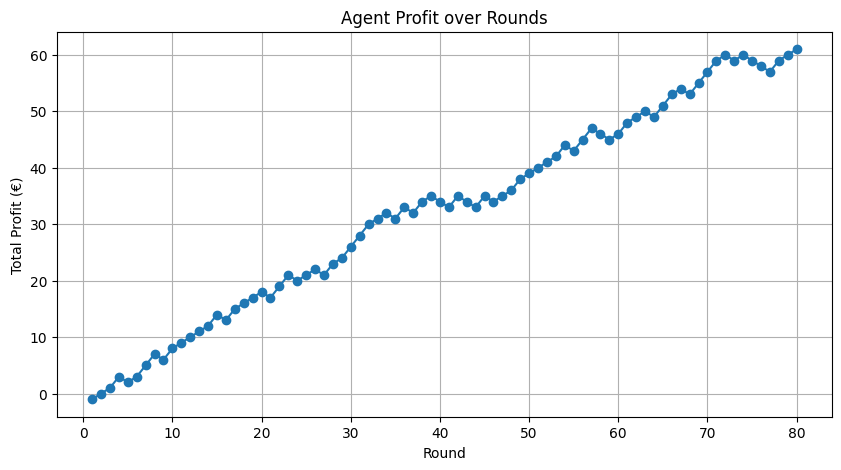

In [85]:
# Plot the profit over rounds
plt.figure(figsize=(10, 5))
plt.plot(range(1, starting_rounds+1), round_profit, marker='o')
plt.title('Agent Profit over Rounds')
plt.xlabel('Round')
plt.ylabel('Total Profit (€)')
plt.grid(True)
plt.show()

## Test my images

Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: scissors.
The game is a draw!



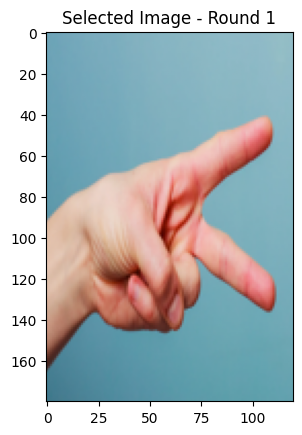

--------------------------------------------------------
Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: rock.
Your agent lost.



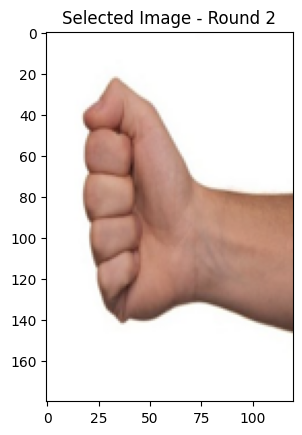

--------------------------------------------------------
Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: paper.
Congratulations! Your agent won! 



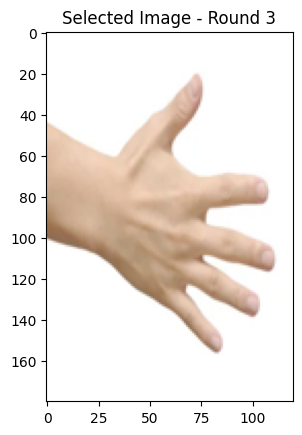

--------------------------------------------------------
Our model predicted that the random agent will play: paper.
So, our agent decided to play: scissors.
But the random agent played: scissors.
The game is a draw!



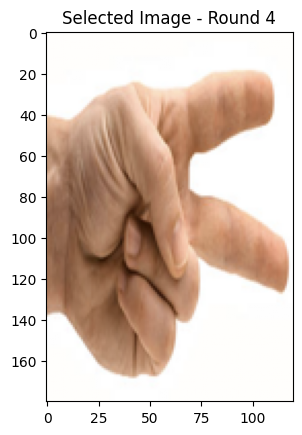

--------------------------------------------------------


In [86]:
# The folder that contains my images
my_folder = 'my_images'
my_labels = [1, 0, 2, 1]

# Load and resize images
my_images = load_and_resize_images(my_folder, target_size=(120, 180))


total_profit = 0

# Play the game using the loaded and resized images
for i, selected_image in enumerate(my_images):

    transformed_image = apply_random_transformations(selected_image)
    flattened_img = transformed_image.flatten()

    reshaped_array = flattened_img.reshape((1, 120 * 180 * 3))  # Assuming RGB images

    selected_label = my_labels[i]
    pred = model.predict(reshaped_array)

    print(f"Our model predicted that the random agent will play: {game_dict[pred[0]]}.")
    
    if game_dict[pred[0]] == 'rock':
        decision_to_play = 2
        print("So, our agent decided to play: paper.")
    elif game_dict[pred[0]] == 'paper':
        decision_to_play = 1
        print("So, our agent decided to play: scissors.")
    elif game_dict[pred[0]] == 'scissors':
         decision_to_play = 0
         print("So, our agent decided to play: rock.")

    print(f"But the random agent played: {game_dict[selected_label]}.")


    # Determine the outcome and update total profit
    if selected_label == decision_to_play:
        print("The game is a draw!")
        total_profit += draw_profit
    elif (decision_to_play == 0 and selected_label == 1) or (decision_to_play == 1 and selected_label == 2) or (decision_to_play == 2 and selected_label == 0):
        print("Congratulations! Your agent won! ")
        total_profit += win_profit
    else:
        print("Your agent lost.")
        total_profit -= loss_penalty

    print()
    

    # Optionally, display the selected image
    plt.imshow(selected_image)
    plt.title(f"Selected Image - Round {i + 1}")
    plt.show()
    
    print('--------------------------------------------------------')
